In [1]:
import time
from glob import glob

import numpy as np
from PIL import Image

import model



Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)



Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instea

It takes time:26.09282612800598s
---------------------------------------







I


Official Receipt
| Tremanction Code - 20190380007


_ Panent Code

u
MEDICATION
<b
Toul.
ee
Pad ,


ao


eae _




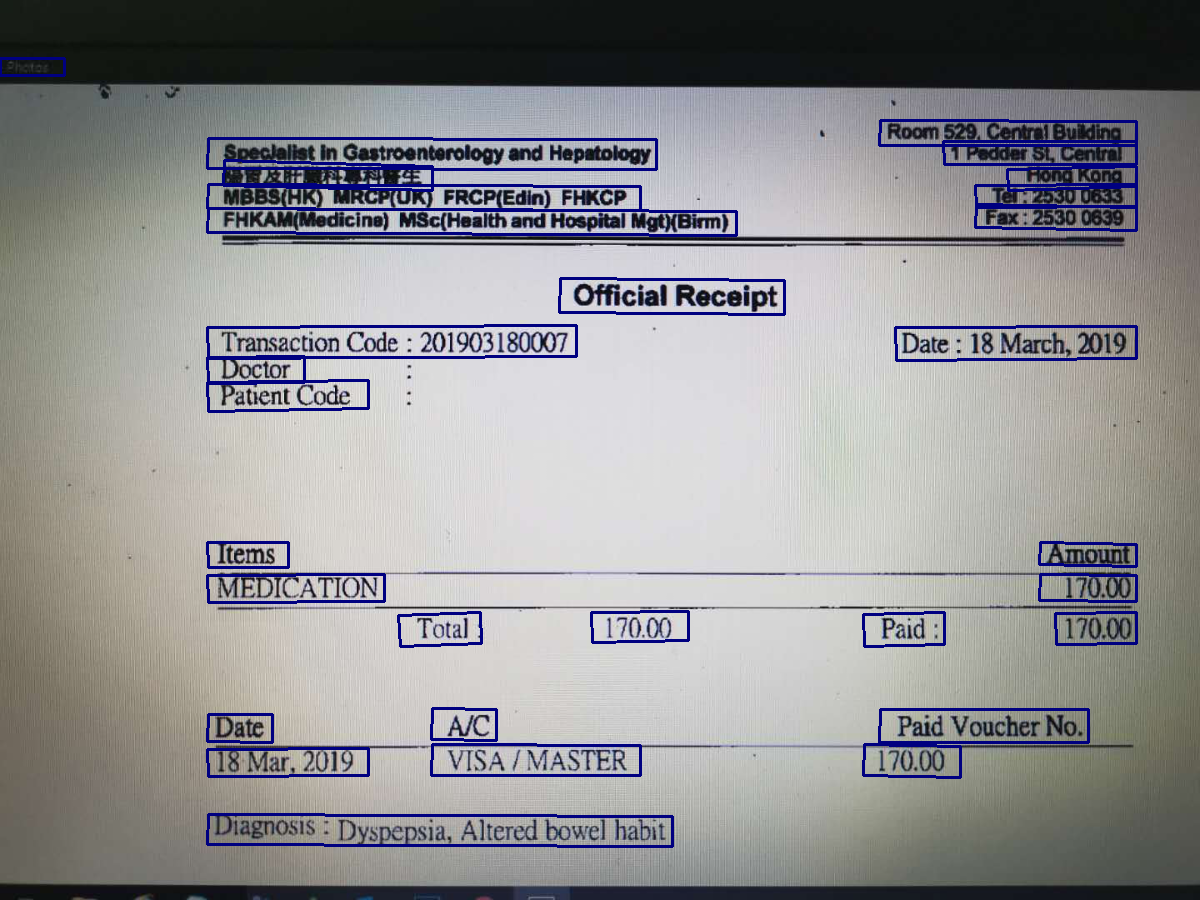

In [2]:
# 运行前需要的配置
# 1. 修改 angle/predict.py 32行 模型地址
# TODO 2. 修改 /ctpn/ctpn/model.py 36 行 checkpoint 地址
# TODO 3. 覆盖/ctpn_detect_v1/ctpn/lib/utils

# https://tesseract-ocr.github.io/tessdoc/ImproveQuality

im = Image.open("/Users/liuliangjun/Downloads/test18.png")
img = np.array(im.convert('RGB'))

t = time.time()

result, img, text_recs = model.model(
    img, model='crnn', adjust=True, detectAngle=True)

print("It takes time:{}s".format(time.time() - t))
print("---------------------------------------")

# 对版面进行排序（bubbleSort）
# [x1,y1] [x2,y2]
benchmark = 8  # 基准像素点，相差在这个范围内的文本域都认为是在同一水平线上
arr = sorted(result.values(), key=lambda x:x[0][1])
_len = len(arr)
for i in range(_len):
    for j in range(0, _len-i-1):
        if (arr[j+1][0][1] - arr[j][0][1]) <= benchmark and arr[j][0][0] > arr[j+1][0][0]:
            # if (y2-y1)<= benchmark and x1 > x2 then change their position
            arr[j], arr[j+1] = arr[j+1], arr[j]
            
# print result
for v in arr:
    print(v[1])
            
Image.fromarray(img)

